# 🎛 Convolution NN
In this notebook, we will see:
1. What the convolution is.
2. Somewhat example *(tiny, little, baby)*.
3. How to code *(in abstract manner)*.

## `1.` WTC!

Mainly, convolution is **all related with the images**. It is, how to *convolute* to *transform* and image and use its output for the next layer.

> And so to simplify, ***it is the activation function of the images***.

Nah, the line above is used too loosely, but just for now, understand it like that.

- We have an image.
- To **extract** features from that image like overall structure, edges, shapes etc we use *some* filters.
- Those filters are called "convolutions"
- And the *layer* made of *those* convolutions are called "convolution layers".

Hold on a sec, lemme show you the image instead.

<img src="../images/cnn.png" width=500 height=300>

You can see those *middle* hidden layers. They are now full of the filters. And, what they filters do? Make your face beautiful in instagram, right?

Here, it makes it worse 🤣
___
Sorry. Let's continue with the intuition.

<img src="../images/filter-1.png" width=500 height=300>

The **filter** is called the **kernel** most of the times. And this **whole process** of **multiplying** is called ***convolution***. You see that here the **blur** filter has been used. Thus, it results the picture with the blur.

<img src="../images/filter-2.png" width=500 height=300>

Here we have applied the **edge detection** kernel so, it amplifies the edge in the image.

> **NOTE:** Here we have shown the `*` sign. It is to show the **process of convolution**. But in the math, it is the multiplication and addition. So, take care of understanding what is going on. We will see a small example in a bit.

#### How to select the filter? Where to get those?
Hold on, we will get to those as well. For now, let's continue with the example.

## `2.` A tiny example

**Step 1**: Have an image and a kernel <br>
<img src="../images/cnn-process-1.png" width=500 height=300>

**Step 2**: Start from the upper left corner <br>
<img src="../images/cnn-process-2.png" width=500 height=300>

**Step 3**: Perform element wise multiplication and add the result <br>
<img src="../images/cnn-process-3.png" width=500 height=300>

And yeah, finally we will have the **output** image or the **convoluted** image.

## `3.` Some code in abstract manner
Here, we will implement the *logic* of this *convolutionizing* stuff. And, we will also see some live examples of the images!

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open('../images/indian_flag.png')

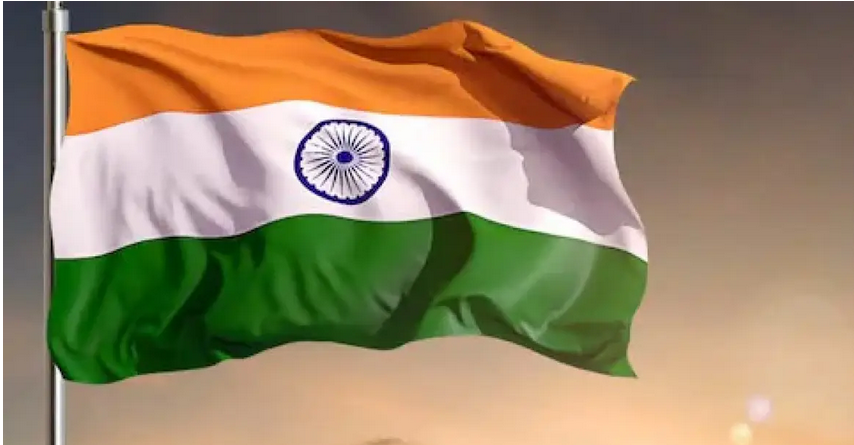

In [3]:
img

In [4]:
np.array(img).shape

(445, 854, 4)

We can see that the *colorful* image has `4` channels.

In [5]:
# converting into grayscale
imgGray = img.convert('L')

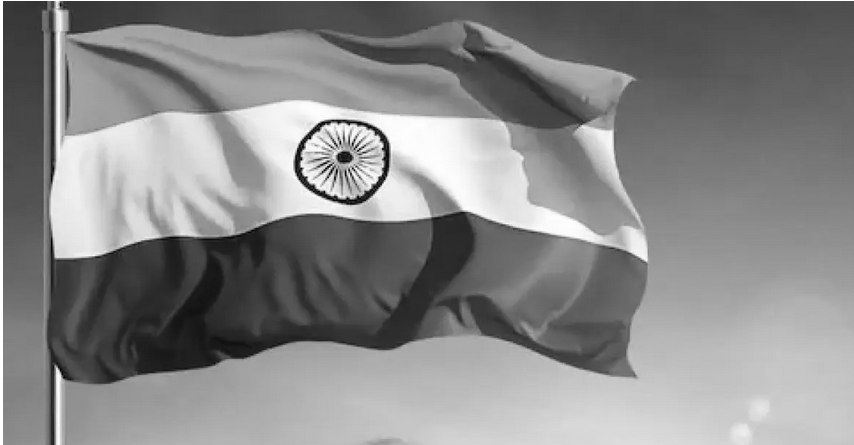

In [6]:
imgGray

In [7]:
np.array(imgGray).shape

(445, 854)

The *grayscale* image has only `1` channel and the data is in 2D.

In [8]:
imgGray = np.array(imgGray)
imgGray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,  78,  78,  78],
       [255, 255, 255, ...,  78,  78,  78],
       ...,
       [255, 255, 255, ..., 199, 198, 197],
       [255, 255, 255, ..., 198, 197, 195],
       [255, 255, 255, ..., 197, 196, 195]], dtype=uint8)

Now, we will write a function which can handle the input, multiply with the filter and output an image as well.
___
Okay, by doing some simple math and finding the pattern on the paper, I have found a formulae which will help us to get the **size of the output image**.

    Suppose, 
    
    Input image: N x M
    Kernel: T x T
    Output image: (N - T + 1) x (M - T + 1)

Sou, in our example...

In [9]:
# N x M
N, M = imgGray.shape
(N, M)

(445, 854)

In [10]:
T = 3
kernel = np.zeros((T, T))
kernel

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [11]:
kernel.shape

(3, 3)

In [12]:
output_image = np.ones(((N - T + 1), (M - T + 1)))
output_image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [13]:
output_image.shape

(443, 852)

Getting it? <br>
No problem if you don't. Let's do some calculation.

In [14]:
def convolutionize(image, kernel):
    """
    This function applies the kernel on the image
    and generates a pretty image that can be used
    as your DP.
    
    But don't do that. The creator of this function
    who is me, doesn't hold any responsibility if 
    you look like a zombie.
    
    🧟‍♀️
    """
    T = kernel.shape[0]
    N, M = image.shape
    output_image = np.zeros(((N - T + 1), (M - T + 1)))
    for row in range(0, N - T + 1):
        for col in range(0, M - T + 1):
            cropped_image = image[row:row+T, col:col+T]
            equation_result = (cropped_image * kernel).sum()
            output_image[row, col] = equation_result
    return output_image

### 1️⃣ Blur Kernel

In [15]:
# the blur kernel
blur_intensity = .5
blur_kernel = np.full((10, 10), blur_intensity)

In [16]:
output_image = convolutionize(imgGray, blur_kernel)

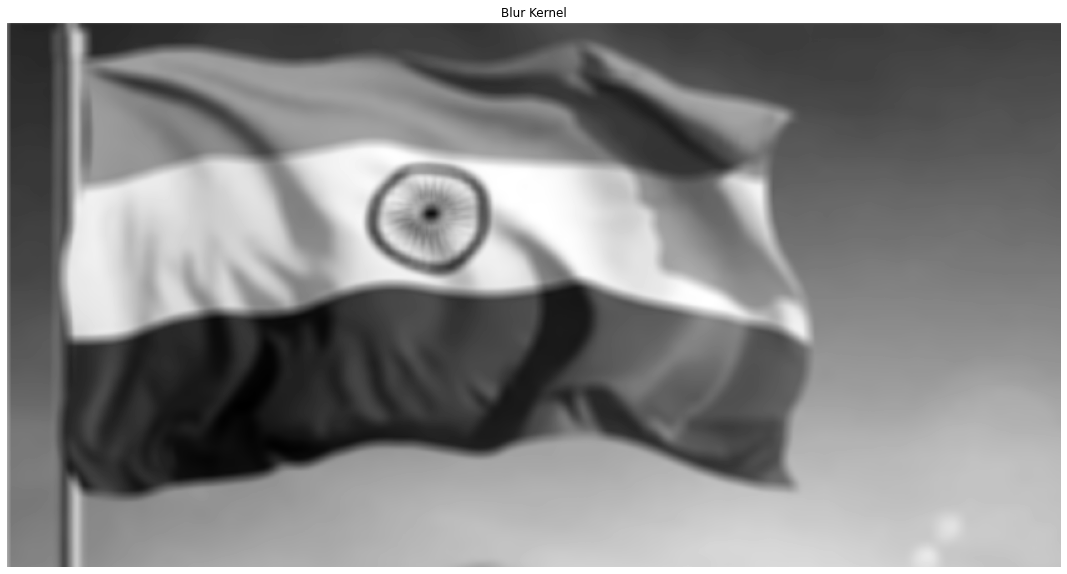

In [17]:
plt.figure(figsize=(20, 10))
plt.imshow(output_image, cmap="gray")
plt.title("Blur Kernel")
plt.axis("off");

### WOO!
We have successfully made our **own** kernel mechanizm. It is the introductory though, it can't handle shape like 3 x 4 of kernel as of now, but still it is working!

> **NOTE**: Numpy has made our life so easy here with its built in vectorization. Without it we would have to write the boilerplate nested loops to make the kernel working!

### 2️⃣ Edge Kernel

In [18]:
# the blur kernel
edge_kernel = np.array([[1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]])

In [19]:
output_image = convolutionize(imgGray, edge_kernel)

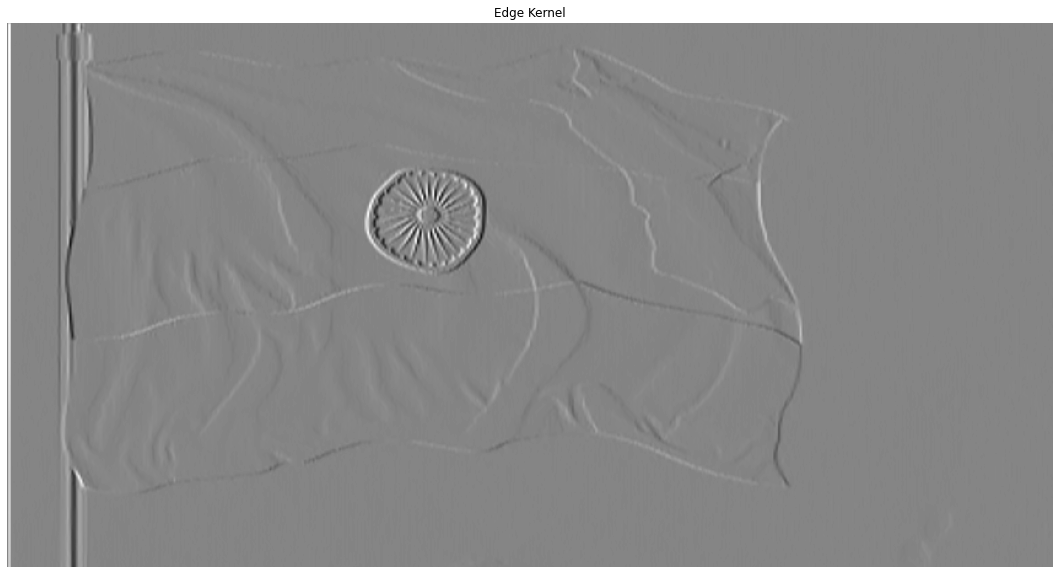

In [20]:
plt.figure(figsize=(20, 10))
plt.imshow(output_image, cmap="gray")
plt.title("Edge Kernel")
plt.axis("off");

### 3️⃣ Sharpen Kernel

In [21]:
# the blur kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

In [22]:
output_image = convolutionize(imgGray, sharpen_kernel)

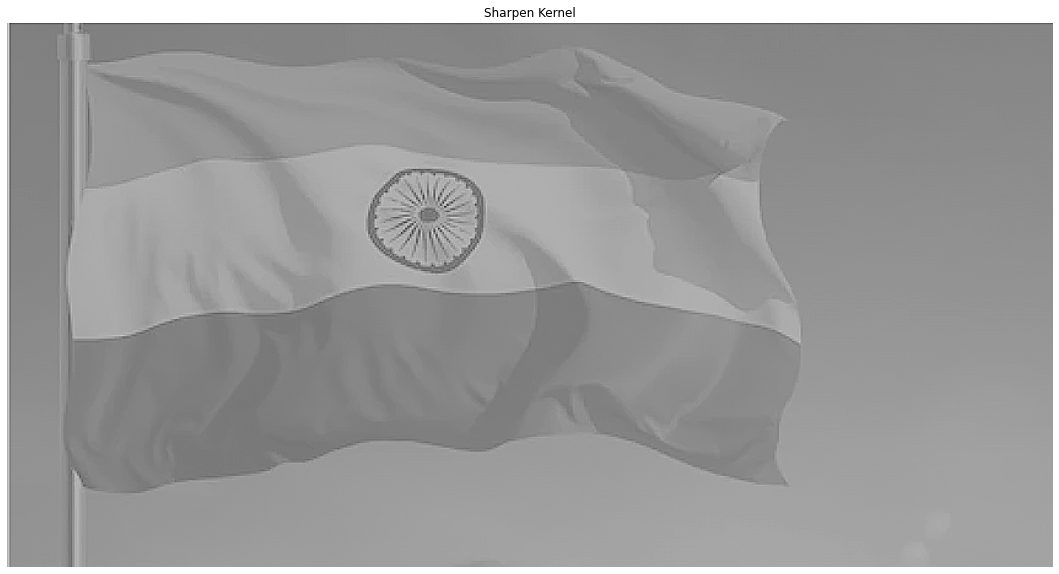

In [23]:
plt.figure(figsize=(20, 10))
plt.imshow(output_image, cmap="gray")
plt.title("Sharpen Kernel")
plt.axis("off");

### 4️⃣ Bottom sobel

In [24]:
# the blur kernel
bottom_sobel = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

In [25]:
output_image = convolutionize(imgGray, bottom_sobel)

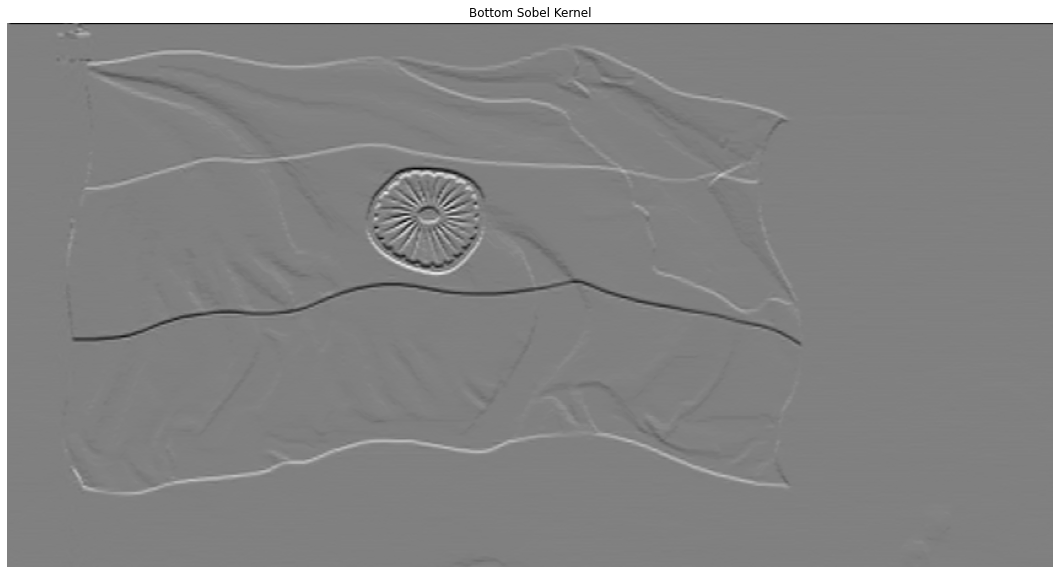

In [26]:
plt.figure(figsize=(20, 10))
plt.imshow(output_image, cmap="gray")
plt.title("Bottom Sobel Kernel")
plt.axis("off");

### 5️⃣ Outline Kernel

In [27]:
# the blur kernel
outline_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

In [28]:
output_image = convolutionize(imgGray, outline_kernel)

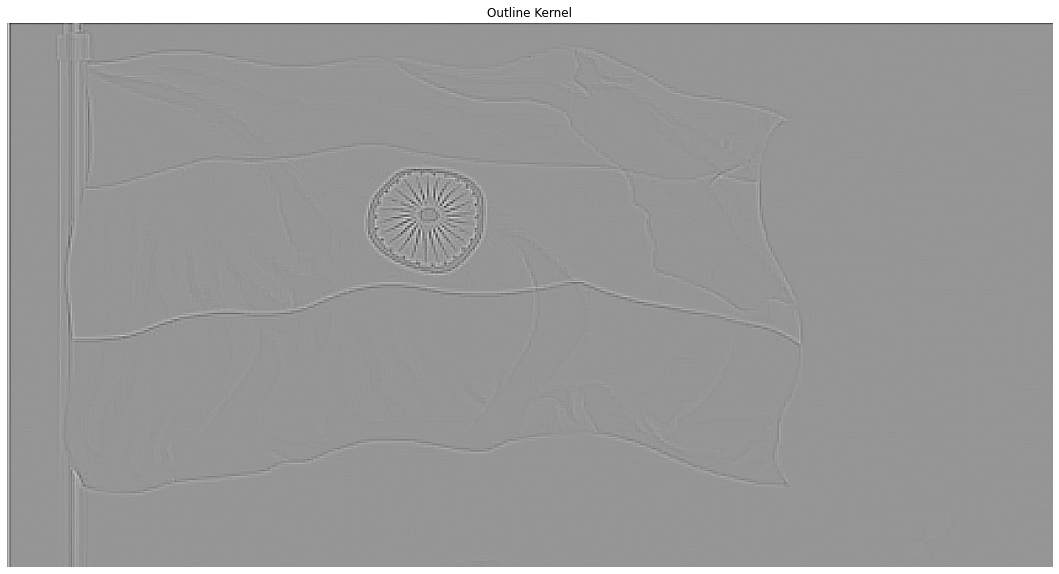

In [29]:
plt.figure(figsize=(20, 10))
plt.imshow(output_image, cmap="gray")
plt.title("Outline Kernel")
plt.axis("off");

I have taken the kernel values from this amazing site: [here](https://setosa.io/ev/image-kernels/)

> **Disclaimer**: I proudfully respect my national flag 🇮🇳  <br> <br>
I have applied kernels here for the study and testing purposes only and had **NO** intention to make my nation's flag in the other way around. I hope, the reader understands my statement.

## 🅰 An Answer.
There was a uestion before... if you recall: *How to select the filter? Where to get those?*

The answer is, ***we won't have to select the filter manually***. The neural network adjusts by itself. Meaning, during the gradient descent process in learning, the filters will be adjusted by themselves which could extract potentially more information from an image.

So, of course the won't necessarily mean something for us. They **won't** be like a blur filter or something else. They will be calculated and set by the NN itself.

## 🏓 Some types of the convolutions: Padding
As we have seen in our example that, the **output image *shrinks*** when applied the convolution. So, to avoid that there are a couple of ways. And they are done using **padding**.

Ways:
1. **Valid** convolution
2. **Same** convolution
3. **Same** convolution

###  Valid Convolution
<img src="../images/valid-cnn.gif" height=300 width=300>

This is what we did. The resulting image is **smaller** than the input image.

###  Same Convolution
<img src="../images/same-cnn.gif" height=300 width=300>

This is done when we add 1 layer of padding in the input image. Here, the output image has the **same shape** as the input image.

### Full Convolution
<img src="../images/full-cnn.gif" height=300 width=300>

This adds more layer of pixels on the image. This results in the **larger shape** of the output image than the input image.

*(GIF courtesy: [here](https://theano-pymc.readthedocs.io/en/latest/tutorial/conv_arithmetic.html))*

# 

## 😗 The real meaning of "filter"
Have you ever, ever thought *"why filter that we use is called filter"?* Take any filter. Either a snapshot, instagram or snapeed anything. Why are they called "filters"? 

That is because, in the filming industry, there were the "red, yellow..." colored lens were used which helped **to filter** the **only** same colored light as the filter is expected to enter in the camera sensor.

Thus, if you use the red filter, the image would look red and so on. Now a days, the term "filter" is used so loosely that even a filter makes you look stupidly beautiful, it is a filter.

Coming on convolution's filter, it is called filter because it **only results an image with the part of an input image which has matched the pattern of the filter and negates other part of the image**.

Take the example below for the reference: <br>
<img src="../images/filter-meaning.png" height=300 width=500>

Here, we have taken ***an eye*** filter which will detect the eye in the image, if that exists. So, in the output image we will see that eye. Because that has matched in the image.

> *Thus, a filter is a pattern*

Now, the term **filter** makes more sense.

## The convolution is called: correlation
Man! Once again!! 

I know, new perspective and terms along the way. But why is it called correlation?

> *The convolution uses the **dot** product inside. Unlike we saw the manual python loops. And **that** dot product is (when derived) related with cosine similarity and cosine similarity has a formulae **very** similar to pearson's correlation.  <br> <br>Thus, convolution is correlation.*

Meaning, <br>
Loops → Dot Product → Cosine → Pearson Correlation

**Intuatively,** <br>
We can understand the **convolution as correlation** because, whenever the pattern is matching, means there is high correlation. And there the (matching part of an image) will spike up. Thus, kinda correlation.

—<br>
*(There is a math, related with dot product but I see them not necessary here.)*

# 

# There is more,
This intro was amazing, I know. But that was for the old time only. We learnt how to deal with the gray scale images. What if we have the color image? Which is in the modern time, right?

So, we will briefly discuss about that in the next notebook. *Why briefly?*: Because this is not the exploration of the object detection course notes. We are exploring the time-series here. I **love** images and image processing, computer vision and what not. But that I am keeping for another time when I will explore those topics explicitly. 

Sou, see you there then!